<span style="color:blue">DAY-19</span>

<span style="color:red;"><b> Clusterring</b></span>

<h2 style="color:purple;"><i>Clustering in Data Science</i></h2>

<p style="color:purple;">
Clustering is an <b>unsupervised learning technique</b> used to group similar data points together based on their features. Unlike supervised learning, clustering doesn't rely on labeled data. Instead, it identifies patterns or groupings in the data automatically.

<br><br>

<b>Common Clustering Algorithms:</b>
<ul style="color:purple;">
  <li><b>K-Means Clustering:</b> Divides data into <i>k</i> clusters by minimizing intra-cluster distance.</li>
  <li><b>Hierarchical Clustering:</b> Builds a hierarchy of clusters using a tree-like structure (dendrogram).</li>
  <li><b>DBSCAN:</b> Groups data points that are closely packed together and marks outliers as noise.</li>
</ul>

<b>Applications of Clustering:</b>
<ul style="color:purple;">
  <li>Customer segmentation</li>
  <li>Market research</li>
  <li>Social network analysis</li>
  <li>Document or image classification</li>
</ul>

<b>Example:</b><br>
Using the <i>Iris dataset</i>, clustering can identify species groups based on petal and sepal measurements without knowing the actual species labels.

<br><br>
Clustering is powerful when dealing with unlabeled data and helps discover hidden patterns or structures.
</p>


In [6]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans  # For clustering
import datetime                     # For date and time operations
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt


In [10]:


try:
    df = pd.read_csv("online_retail_II.csv")
except FileNotFoundError:
    print("❗ File not found. Please download it from Kaggle and place it in the correct directory.")
    print("Kaggle Link: https://www.kaggle.com/datasets/meanlyn/online-retail-1l-wei")
    exit()

# Inspect the first 5 rows
print(df.head())

# Check dataset info
print(df.info())


  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  Price  Customer ID         Country  
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3  2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4  2009-12-01 07:45:00   1.25      13085.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice 

In [11]:
print(df.isnull().sum())

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64


In [12]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [13]:


print("\n--- Step 2: Data Cleaning and Preprocessing ---")

# Drop rows where Customer ID is null
df.dropna(subset=['Customer ID'], inplace=True)

# Convert Customer ID to integer (from float)
df['Customer ID'] = df['Customer ID'].astype(int)

# Remove rows where Quantity or Price are negative or zero
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]

# Convert InvoiceDate to datetime object
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Show cleaned data
print("\nCleaned DataFrame Head:")
print(df.head())

# Show DataFrame shape after cleaning
print("\nDataFrame shape after cleaning:", df.shape)



--- Step 2: Data Cleaning and Preprocessing ---

Cleaned DataFrame Head:
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95        13085  United Kingdom  
1 2009-12-01 07:45:00   6.75        13085  United Kingdom  
2 2009-12-01 07:45:00   6.75        13085  United Kingdom  
3 2009-12-01 07:45:00   2.10        13085  United Kingdom  
4 2009-12-01 07:45:00   1.25        13085  United Kingdom  

DataFrame shape after cleaning: (805549, 8)


In [14]:

from datetime import timedelta

print("\n--- Step 3: Calculating RFM Metrics ---")

# Step 1 — Calculate Total Price for each transaction
df['TotalPrice'] = df['Quantity'] * df['Price']

# Step 2 — Define snapshot date (day after the last invoice date)
snapshot_date = df['InvoiceDate'].max() + timedelta(days=1)
print(f"📅 Snapshot Date for Recency calculation: {snapshot_date.date()}")

# Step 3 — Group by Customer ID and calculate RFM
rfm_df = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda date: (snapshot_date - date.max()).days,   # Recency
    'Invoice': 'nunique',                                            # Frequency
    'TotalPrice': 'sum'                                              # Monetary
}).reset_index()

# Step 4 — Rename columns
rfm_df.rename(columns={
    'InvoiceDate': 'Recency',
    'Invoice': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)

# Step 5 — Display results
print("\n📝 RFM DataFrame Head:")
print(rfm_df.head())

print("\n📊 RFM DataFrame Description:")
print(rfm_df.describe())



--- Step 3: Calculating RFM Metrics ---
📅 Snapshot Date for Recency calculation: 2011-12-10

📝 RFM DataFrame Head:
   Customer ID  Recency  Frequency  Monetary
0        12346      326         12  77556.46
1        12347        2          8   5633.32
2        12348       75          5   2019.40
3        12349       19          4   4428.69
4        12350      310          1    334.40

📊 RFM DataFrame Description:
        Customer ID      Recency    Frequency       Monetary
count   5878.000000  5878.000000  5878.000000    5878.000000
mean   15315.313542   201.331916     6.289384    3018.616737
std     1715.572666   209.338707    13.009406   14737.731040
min    12346.000000     1.000000     1.000000       2.950000
25%    13833.250000    26.000000     1.000000     348.762500
50%    15314.500000    96.000000     3.000000     898.915000
75%    16797.750000   380.000000     7.000000    2307.090000
max    18287.000000   739.000000   398.000000  608821.650000


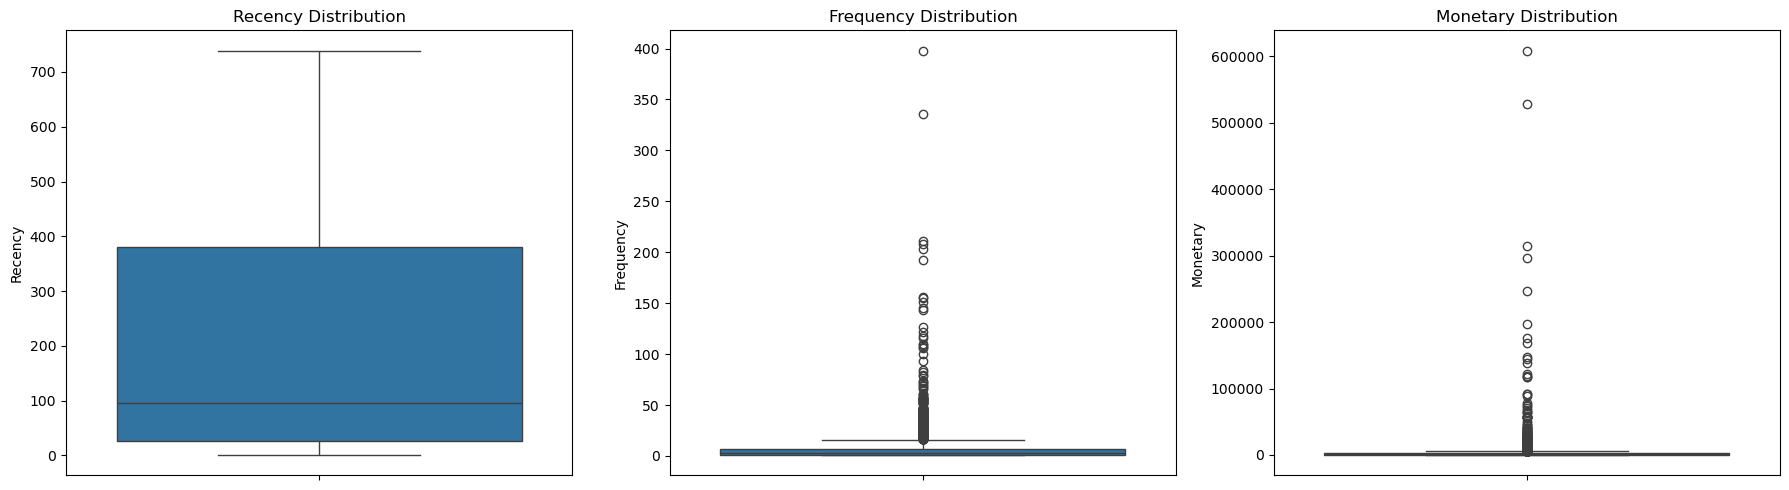

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 5))

# Recency Boxplot
plt.subplot(1, 3, 1)
sns.boxplot(y=rfm_df['Recency'])
plt.title('Recency Distribution')

# Frequency Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(y=rfm_df['Frequency'])
plt.title('Frequency Distribution')

# Monetary Boxplot
plt.subplot(1, 3, 3)
sns.boxplot(y=rfm_df['Monetary'])
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()
